Import modules that contains all the functions to solve the problems

In [1]:
import modules as m

# Problem 1

The function $\texttt{create}$\_$\texttt{authors}$\_$\texttt{graph}$ works as follow:
- opens the file given as string (input);
- creates the publications' dictionary: for each authors collect the list of his\her publications
- creates the graph based on publications' dictionary using networkx library (the authors that shared the same publication are connected)

In [2]:
authors_graph = m.create_authors_graph('full_dblp.json')

Loading full_dblp.json...
Creating the dictionary of publications...
Creating the authors graph...
Graph created!


The authors graph is defined as follow:
- each node is identified by the author's id;
- each edge is weighted using the formula: 
$w(a_{1},a_{2})= 1- J(p_{1},p_{2}) \text{ where J is defined as: } \frac{|p_1 \cap p_2|}{|p_1 \cup p_2|}$

# Problem 2

First of all we create a dictionary for all the publications: the key is the conference_id and the value is a set of authors id. 

In [3]:
confs_dict = m.create_conferences_dictionary('full_dblp.json')

Loading full_dblp.json...
Creating the dictionary of conferences...
Dictionary created!


The $\texttt{confs}$\_$\texttt{dict}$ is used for building the subgraph: for a given conference id we used its value to identify the authors in the complete $\texttt{authors}$\_$\texttt{graph}$. For example, we create a subgraph for the conference id = 10.

In [4]:
subgraph = m.subgraph(authors_graph, confs_dict, 10)

For the visualization we used the $\texttt{visualize}$\_$\texttt{graph}$

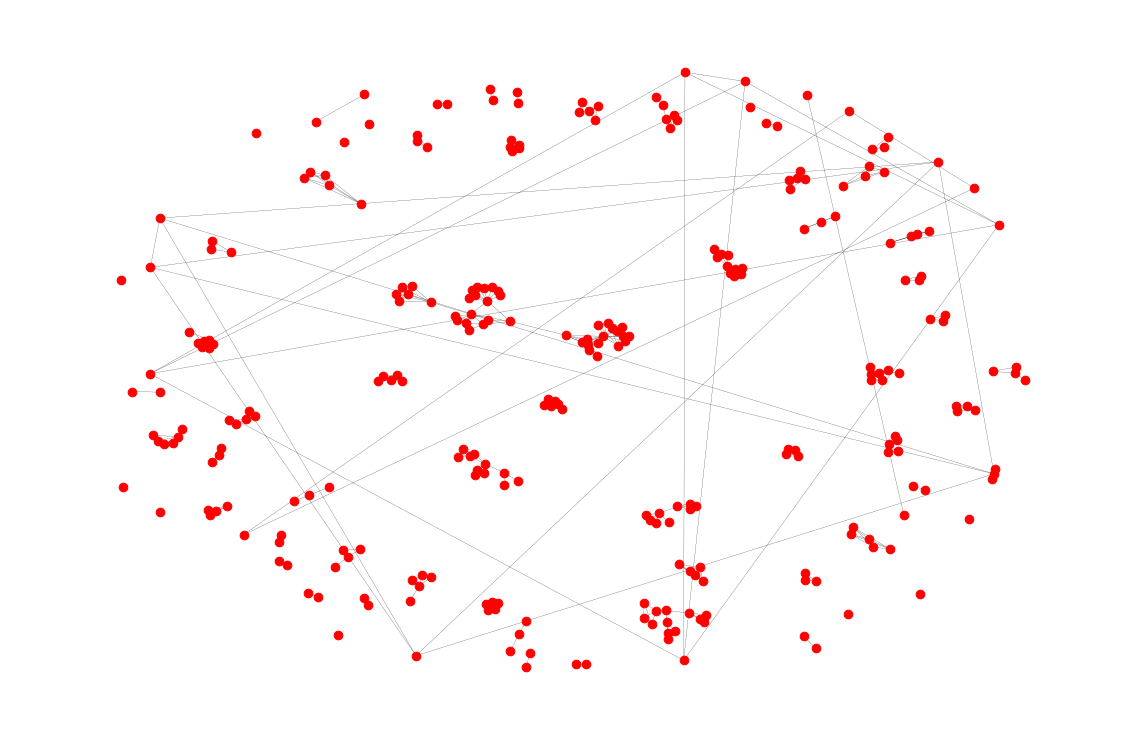

In [5]:
m.visualize_graph(subgraph, node_labels = False, edge_labels = False)

## Degree 
The node degree is the number of edges adjacent to the node. Degree is simply the number of nodes at distance one.

Using the function $\texttt{get}$\_$\texttt{centralities}$ the degree, betwenness and closness are computed (using networkx library). 

In [17]:
degree, betweenness, closeness = m.get_centralities(subgraph) 

The function $\texttt{visualize}$\_$\texttt{histogram}$ plot the degree values. In the following histogram the x axes represents the degree and the y axes the number of nodes.

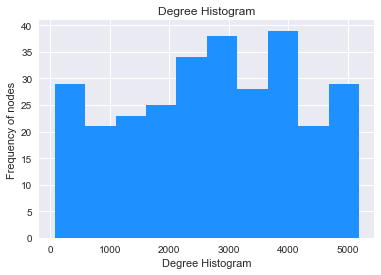

In [18]:
m.visualize_histogram(degree, 'Degree Histogram')

## Betweenness

The betweenness centrality is a measure of centrality in a graph based on shortest paths. Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. The betweenness centrality of a node $v$ is given by the expression:

$g(v)=\sum _{{s\neq v\neq t}}{\frac  {\sigma _{{st}}(v)}{\sigma _{{st}}}}$ where $\sigma_{st}$ is the total number of shortest paths from node $s$ to node $t$ and $\sigma_{st}(v)$ is the number of those paths that pass through $v$.




In the following Betweenness Histogram, the x axes represents the betweenness centrality measure computed used networkx and the y the corresponding number of nodes. Most of the nodes results to have betweenness equal to zero. 

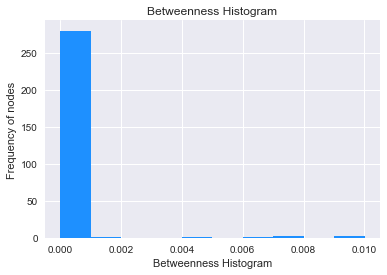

In [19]:
m.visualize_histogram(betweenness, 'Betweenness Histogram')

## Closenesss
The closeness centrality of a node is a measure of centrality in a network, calculated as the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes.

Closeness is defined as:
$C(x)={\frac  {1}{\sum _{y}d(y,x)}}$ where ${\displaystyle d(y,x)}$ is the distance between vertices $x$ and $y$.

In the following Closeness Histogram, the x axes represents the closeness centrality measure computed used networkx and the y the corresponding number of nodes. Most of the nodes have closness less than or equal to 0.02. 

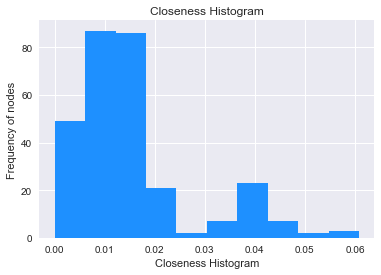

In [20]:
m.visualize_histogram(closeness, 'Closeness Histogram')

Given in input an author id and an integer d, the function $\texttt{graph}$\_$\texttt{distance}$ gets the subgraph induced by the nodes that have hop distance at most equal to d with the input author.
We create a subgraph which has Aris (id = 256176) as root node connected to the other nodes that are at most at the second level of distance.

In [9]:
hop_graph = m.graph_distance(authors_graph, 256176, 2)

In the following subgraph the yellow node represents the source node (in this example Aris) and the other nodes are the authors at distance 2 from the given node. The subgraph includes 705 nodes and 2826 edges. The 

In [10]:
import networkx as nx
nx.info(hop_graph)

'Name: \nType: Graph\nNumber of nodes: 705\nNumber of edges: 2826\nAverage degree:   8.0170'

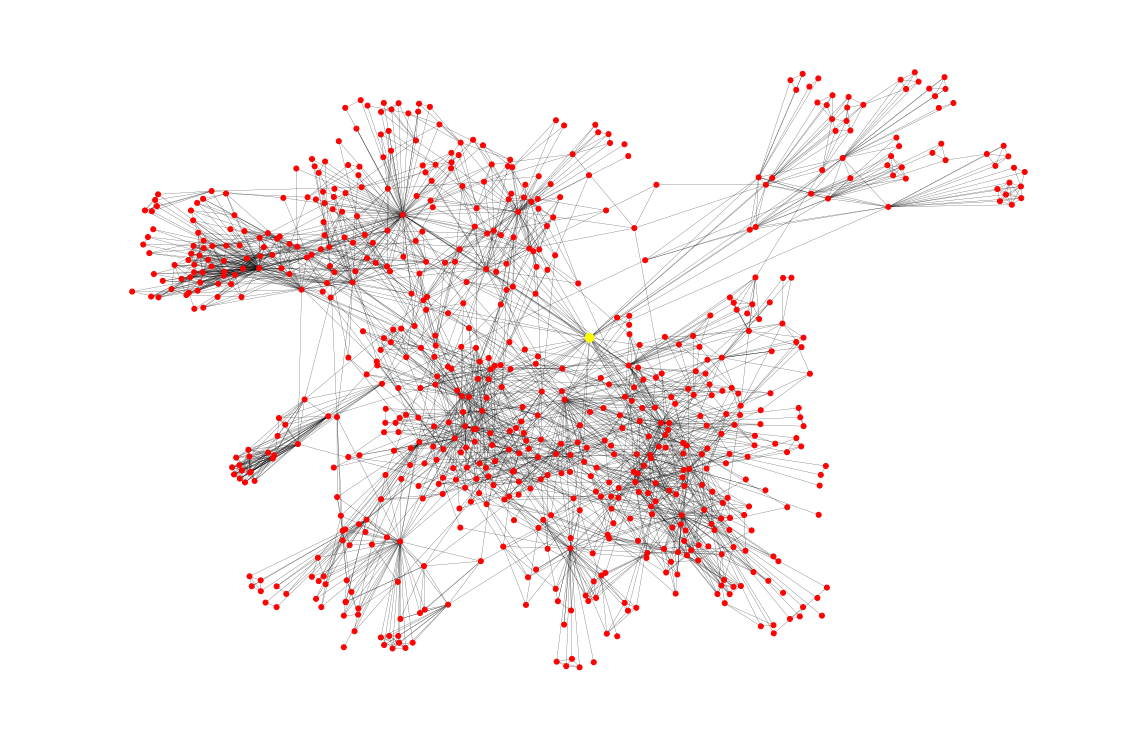

In [11]:
m.visualize_graph(hop_graph,node_labels = False, edge_labels = False, root_node = 256176)

The only yellow node represents Aris.

# Problem 3

In this problem we implemented the function $\texttt{shortest}$\_$\texttt{path}$ which calculates very efficiently the minimum distance between two nodes, or infinity if the two nodes are not connected. For example, we want to know the distance between the node 256176 (Aris) and the node 317546.

In [13]:
m.shortest_path(authors_graph, 256176, 317546) #Shortest distance between 256176 and 317546

1.9017412935323383

Or we want to know the distance between the first node and the last node.

In [17]:
m.shortest_path(authors_graph, 1, 904664) #Shortest distance between 1 and 904664

There is not a path from 904663 to 1


inf

Now we calculate the group number of the $\texttt{authors}$\_$\texttt{graph}$ using the function $\texttt{group}$\_$\texttt{number}$. In the following example we use a list that contains 10 nodes.

In [19]:
I = [256176, 317546, 1, 75500, 64000, 300, 700, 28000, 900000, 620000]

In [20]:
groups = m.group_number(authors_graph, I)

Updating shortest paths from node: 256176
Updating shortest paths from node: 317546
Updating shortest paths from node: 1
Updating shortest paths from node: 75500
Updating shortest paths from node: 64000
Updating shortest paths from node: 300
Updating shortest paths from node: 700
Updating shortest paths from node: 28000
Updating shortest paths from node: 900000
Updating shortest paths from node: 620000


The variable $\texttt{groups}$ is a dictionary that contains the nodes of the $\texttt{authors}$\_$\texttt{graph}$ as keys and the pairs ($\texttt{shortest path(u)}$, $\texttt{nearest root node}$), where $\texttt{u}$ is any node in $\texttt{authors}$\_$\texttt{graph}$ and $\texttt{nearest root node}$ is a node in the list $\texttt{I}$ that is at the minimal distance from $\texttt{u}$.

In [21]:
groups

{1: (0, 1),
 2: (0.75, 1),
 3: (0.5, 1),
 4: (3.927040405938733, 28000),
 5: (3.57726574500768, 317546),
 6: (3.9190610526455405, 28000),
 7: (4.4190610526455405, 28000),
 8: (4.4190610526455405, 28000),
 9: (3.780788147454814, 620000),
 10: (3.636279909760722, 28000),
 11: (3.75638858271922, 256176),
 12: (3.837094103505993, 620000),
 13: (4.337094103505994, 620000),
 14: (3.837094103505993, 620000),
 15: (3.996732026143791, 64000),
 16: (3.496732026143791, 64000),
 17: (3.9447024742511205, 64000),
 18: (4.637420527332274, 28000),
 19: (3.856035245946993, 28000),
 20: (4.833383031462336, 28000),
 21: (3.86671636479567, 28000),
 22: (5.52804454295629, 28000),
 23: (6.37804454295629, 28000),
 24: (6.32804454295629, 28000),
 25: (3.755003461836712, 256176),
 26: (3.828205128205128, 256176),
 27: (4.555003461836712, 256176),
 28: (3.8473306776437535, 620000),
 29: (3.8406509312188826, 64000),
 30: (3.8406509312188826, 64000),
 31: (4.456828851274434, 620000),
 32: (4.803171999366667, 6200